In [177]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

from catboost import CatBoostRegressor

In [178]:
df = pd.read_csv("covid.csv")

# Data Exploration

In [179]:
df.shape

(566602, 23)

In [180]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [181]:
df.head(15)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,9999-99-99,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [182]:
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [184]:
# How many female patients are pregnant

x = df.loc[(df.sex == 1) & (df.pregnancy == 1)]
print(len(x))

4063


In [185]:
# How many Covid positive patients were tobacco users

x = df.loc[(df.covid_res == 2) & (df.tobacco == 1)]
print(len(x))

25846


# Finding value counts of categorical variables

CLAVE	DESCRIPCIÓN
1	YES
2	NO
97	Not Applicable
98	Ignore
99	Not Specified

1	Female
2	Male
99	Not Specified

In [186]:
# Create a subset of categorical variables only
subset = df.drop(columns= ['date_died', 'entry_date', 'date_symptoms', 'id', 'age'])

In [187]:
for col in subset.columns:
    print(subset[col].value_counts())

2    287112
1    279490
Name: sex, dtype: int64
1    444689
2    121913
Name: patient_type, dtype: int64
97    444689
2     111824
1       9965
99       124
Name: intubed, dtype: int64
2     478416
1      88175
99        11
Name: pneumonia, dtype: int64
97    287112
2     273840
1       4063
98      1587
Name: pregnancy, dtype: int64
2     493790
1      70831
98      1981
Name: diabetes, dtype: int64
2     555723
1       9130
98      1749
Name: copd, dtype: int64
2     546824
1      18026
98      1752
Name: asthma, dtype: int64
2     555644
1       8978
98      1980
Name: inmsupr, dtype: int64
2     472270
1      92508
98      1824
Name: hypertension, dtype: int64
2     546920
1      17084
98      2598
Name: other_disease, dtype: int64
2     552005
1      12775
98      1822
Name: cardiovascular, dtype: int64
2     472549
1      92272
98      1781
Name: obesity, dtype: int64
2     553560
1      11250
98      1792
Name: renal_chronic, dtype: int64
2     516678
1      48017
98      1907
N

In [188]:
# Removing rows that have covid_res= 3 meaning 'pending'
index_names = df[ df['covid_res'] == 3 ].index
df.drop(index_names, inplace = True)

In [189]:
# Checking value_counts of covid_res column
df['covid_res'].value_counts()

2    279035
1    220657
Name: covid_res, dtype: int64

In [190]:
# Change dae_died column to categorical data "9999-99-99" to 0 and row with date to 1
df.loc[df.date_died == "9999-99-99", "date_died"] = 0

In [191]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,0,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,0,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,0,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,0,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [192]:
df.loc[df.date_died != 0, "date_died"] = 1

In [193]:
df.head(10)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,0,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,0,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,0,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,0,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,1,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,1,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,0,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,0,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,0,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,0,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [194]:
df['date_died'].value_counts()

0    465571
1     34121
Name: date_died, dtype: int64

In [195]:
df["date_died"] = df["date_died"].astype("int64")

# Visualization

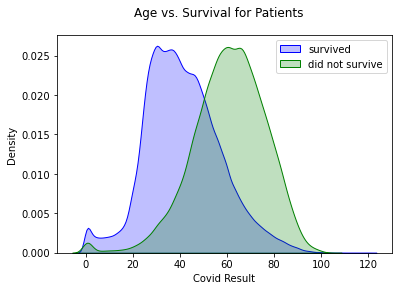

In [196]:
# Plotting Age vs Survival rate of Patients Admitted to the hospital
fig, ax = plt.subplots()

sns.kdeplot(df[df["date_died"]==0]["age"], shade=True, color="blue", label="survived", ax=ax)
sns.kdeplot(df[df["date_died"]==1]["age"], shade=True, color="green", label="did not survive", ax=ax)

ax.legend()
ax.set_xlabel("Covid Result")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Survival for Patients");

# We see from the above graph that Age cannot be considered a factor for Covid deaths

[Text(0, 0, 'positive'), Text(1, 0, 'not positive')]

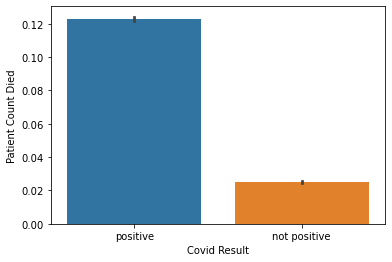

In [197]:
# Plotting Patient Count Died versus Covid Result
ax = sns.barplot(x="covid_res", y="date_died", data=df)
ax.set_xlabel("Covid Result")
ax.set_ylabel("Patient Count Died")
ax.set_xticklabels(["positive", "not positive"])

[Text(0, 0, 'positive'), Text(1, 0, 'not positive')]

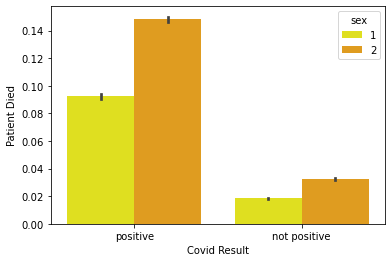

In [198]:
# Plotting Male/Female Patient Count Died vs Covid Result"
ax = sns.barplot(x="covid_res", y="date_died", hue="sex", palette={1:"yellow", 2:"orange"}, data=df)
ax.set_xlabel("Covid Result")
ax.set_ylabel("Patient Died")
ax.set_xticklabels(["positive", "not positive"])

In [199]:
# Create new dataframe with only pre-existing conditions
pre_existing_df = subset.drop(columns= ['sex', 'icu', 'covid_res', 'contact_other_covid', 'intubed', 'patient_type'])

In [200]:
# len(df[df.sex == 1].index)
pre_existing_count = []
pre_existing_labels = []
for col in pre_existing_df.columns:
    pre_existing_count.append(len(pre_existing_df[pre_existing_df[col] == 1].index))
    pre_existing_labels.append(col)

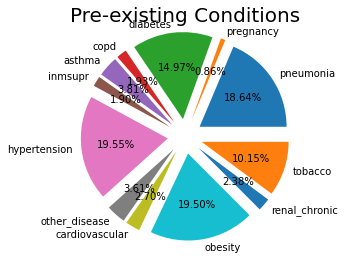

In [201]:
# Plotting precentage of pre-exsiting conditions in the dataset
plt.pie(pre_existing_count,labels = pre_existing_labels,autopct = '%.2f%%', explode=[0.2]*12)
plt.title('Pre-existing Conditions', fontsize = 20)
plt.show()

# Plotting Patient who were in contact with other covid patients versus Covid Result
# Top three pre-existing conditions have the count of death

# Machine Learning

In [203]:
df = df.sample(n=10000)

In [204]:
# Create our features
X = df.drop(columns= ['date_died', 'entry_date', 'date_symptoms', 'id', 'age'])

# Create our target
y = df['date_died']

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [206]:
X.dtypes

sex                    int64
patient_type           int64
intubed                int64
pneumonia              int64
pregnancy              int64
diabetes               int64
copd                   int64
asthma                 int64
inmsupr                int64
hypertension           int64
other_disease          int64
cardiovascular         int64
obesity                int64
renal_chronic          int64
tobacco                int64
contact_other_covid    int64
covid_res              int64
icu                    int64
dtype: object

In [207]:
y.value_counts()

0    9342
1     658
Name: date_died, dtype: int64

# Balanced Random Forest Classifier

In [208]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brfc_model = BalancedRandomForestClassifier(n_estimators =100, random_state=1)
brfc_model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [218]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = brfc_model.predict(X_test)
b_accuracy = balanced_accuracy_score(y_test, y_pred)

print('the test accuracy is :{:.6f}'.format(balanced_accuracy_score(y_test, y_pred)))

the test accuracy is :0.884771


In [210]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1995,  340],
       [  14,  151]])

In [211]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.85      0.92      0.92      0.88      0.78      2335
          1       0.31      0.92      0.85      0.46      0.88      0.79       165

avg / total       0.95      0.86      0.91      0.89      0.88      0.78      2500



In [212]:
# List the features sorted in descending order by feature importance
features = pd.Series(data=brfc_model.feature_importances_,index=X.columns)
features.sort_values(ascending=False,inplace=True)
print(features)

patient_type           0.210673
icu                    0.204601
intubed                0.148057
pneumonia              0.125629
contact_other_covid    0.067078
covid_res              0.043136
hypertension           0.033737
diabetes               0.032864
obesity                0.024275
copd                   0.018027
pregnancy              0.014768
tobacco                0.013378
sex                    0.012937
other_disease          0.012839
renal_chronic          0.012555
cardiovascular         0.008850
inmsupr                0.008826
asthma                 0.007769
dtype: float64


# Cat Boost Calssifier

In [213]:
X.dtypes

sex                    int64
patient_type           int64
intubed                int64
pneumonia              int64
pregnancy              int64
diabetes               int64
copd                   int64
asthma                 int64
inmsupr                int64
hypertension           int64
other_disease          int64
cardiovascular         int64
obesity                int64
renal_chronic          int64
tobacco                int64
contact_other_covid    int64
covid_res              int64
icu                    int64
dtype: object

In [214]:
from catboost import CatBoostClassifier

In [215]:
cat_features_index = np.where(X.dtypes != float)[0]

In [216]:
model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42)

## Set the metric for evaluation
model = CatBoostClassifier(eval_metric='Accuracy',
use_best_model=True,  random_seed=42)

model.fit(X_train, y_train, cat_features=cat_features_index,
eval_set=(X_test, y_test), plot=True)

# model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.052125
0:	learn: 0.9342667	test: 0.9340000	best: 0.9340000 (0)	total: 22.4ms	remaining: 22.4s
1:	learn: 0.9342667	test: 0.9340000	best: 0.9340000 (0)	total: 39.8ms	remaining: 19.9s
2:	learn: 0.9342667	test: 0.9340000	best: 0.9340000 (0)	total: 59ms	remaining: 19.6s
3:	learn: 0.9342667	test: 0.9340000	best: 0.9340000 (0)	total: 72.1ms	remaining: 18s
4:	learn: 0.9342667	test: 0.9340000	best: 0.9340000 (0)	total: 90.3ms	remaining: 18s
5:	learn: 0.9342667	test: 0.9340000	best: 0.9340000 (0)	total: 102ms	remaining: 16.9s
6:	learn: 0.9342667	test: 0.9340000	best: 0.9340000 (0)	total: 111ms	remaining: 15.7s
7:	learn: 0.9342667	test: 0.9340000	best: 0.9340000 (0)	total: 135ms	remaining: 16.7s
8:	learn: 0.9342667	test: 0.9340000	best: 0.9340000 (0)	total: 149ms	remaining: 16.4s
9:	learn: 0.9342667	test: 0.9340000	best: 0.9340000 (0)	total: 166ms	remaining: 16.4s
10:	learn: 0.9342667	test: 0.9340000	best: 0.9340000 (0)	total: 198ms	remaining: 17.8s
11:	learn: 0.9342667	tes

In [217]:
from catboost import cv
from sklearn.metrics import accuracy_score

print('the test accuracy is :{:.6f}'.format(accuracy_score(
y_test, model.predict(X_test))))

the test accuracy is :0.946800


# Easy Ensemble AdaBoost Classifier